### #4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows =7177)

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


### #5

In [5]:
gdp_df.shape

(7176, 4)

### #6

In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [9]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [10]:
gdp_df[gdp_df.iloc[:, 2]=='NaN']

,Country,Year,GDP_Per_Capita


### #7 not finished

In [11]:
gdp_year_count = gdp_df.Country.value_counts()
gdp_year_count

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [12]:
gdp_year_count = gdp_year_count.reset_index()

In [13]:
gdp_year_count

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [14]:
gdp_year_count = gdp_year_count.rename(columns = {'index' :'Country', 'Country' : 'Year_count'})

In [15]:
gdp_year_count

,Country,Year_count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [16]:
gdp_year_count.loc[gdp_year_count['Year_count']> 30]

,Country,Year_count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


### There are 205 countries that have data for all years

### observations by country

In [17]:
gdp_year_count.loc[gdp_year_count['Year_count']< 31]

,Country,Year_count
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


### observations by year

In [18]:
gdp_df.Year.value_counts()

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

In [19]:
data_2020 = gdp_df[gdp_df.Year == 2020]

### #8

(array([110.,  60.,  23.,  20.,  14.,   6.,   3.,   1.,   2.,   1.]),
 array([   731.06407364,  11913.68861346,  23096.31315328,  34278.9376931 ,
         45461.56223291,  56644.18677273,  67826.81131255,  79009.43585237,
         90192.06039218, 101374.684932  , 112557.30947182]),
 <BarContainer object of 10 artists>)

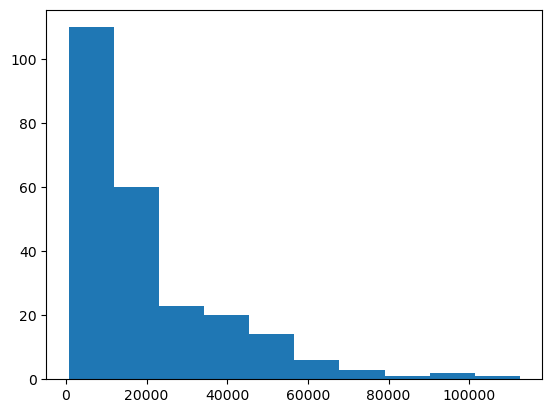

In [20]:
plt.hist(data_2020.GDP_Per_Capita) #histogram plot

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

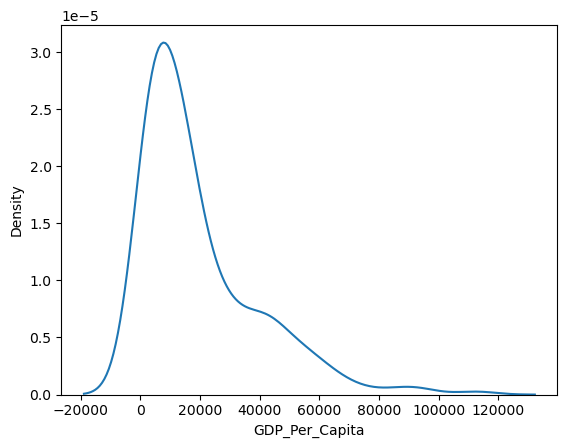

In [21]:
sns.kdeplot(data_2020.GDP_Per_Capita) #density plot with seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

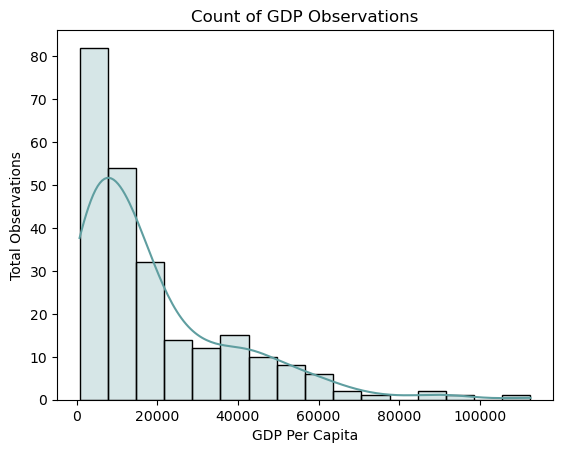

In [66]:
sns.histplot(data=data_2020, 
             x = 'GDP_Per_Capita', 
             kde=True, color='cadetblue', 
             fill=True, alpha=.25, linewidth=1)
plt.xlabel('GDP Per Capita')
plt.ylabel('Total Observations')
plt.title('Count of GDP Observations')
plt.show

Text(0.5, 1.0, 'Distribution of GDP per capita - 2020')

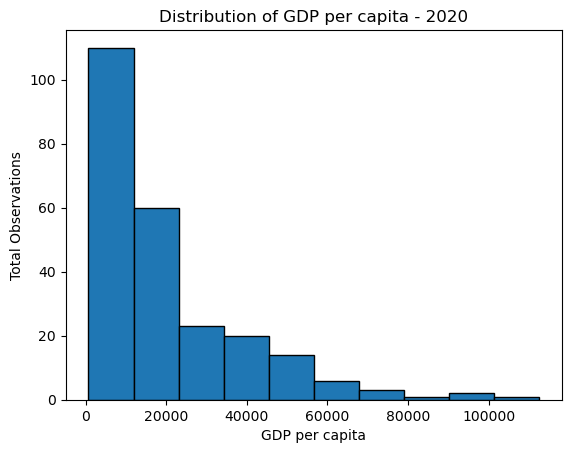

In [67]:
plt.hist(data_2020['GDP_Per_Capita'], bins=10, edgecolor='k')
plt.xlabel('GDP per capita')
plt.ylabel('Total Observations')
plt.title('Distribution of GDP per capita - 2020')

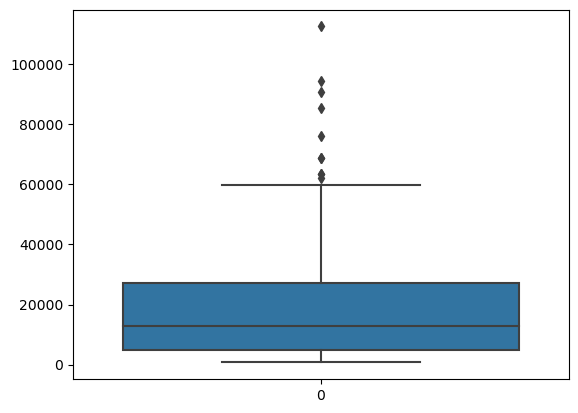

In [63]:
sns.boxplot(data_2020.GDP_Per_Capita); #boxplot with seaborn

<Axes: >

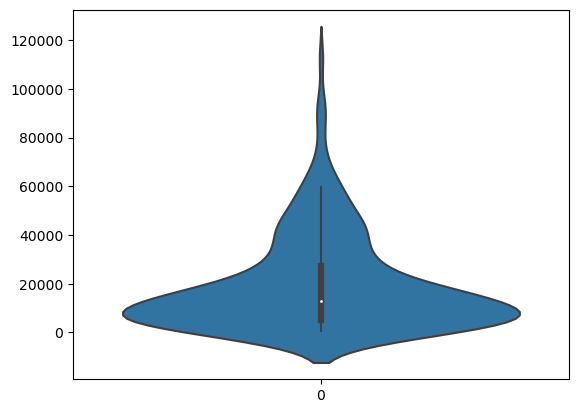

In [23]:
sns.violinplot(data_2020.GDP_Per_Capita) #violinplot with seaborn

### #9

In [24]:
data_2020.GDP_Per_Capita.median()

12908.9374056206

### #10

In [68]:
gdp_decades = gdp_df.loc[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | 
                         (gdp_df['Year'] == 2010) | (gdp_df['Year'] == 2020)]
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

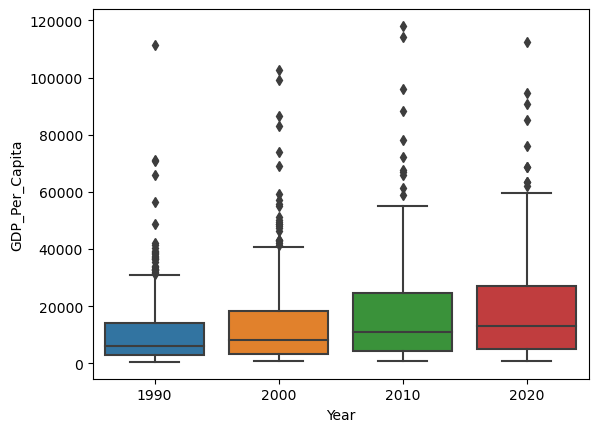

In [72]:

sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita']) #boxchart for gdp per decade in seaborn

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

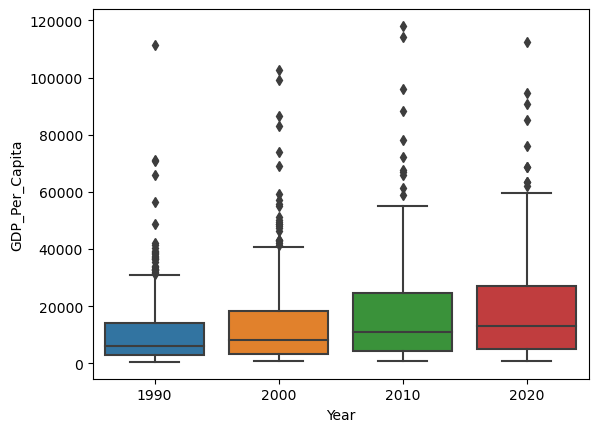

In [70]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

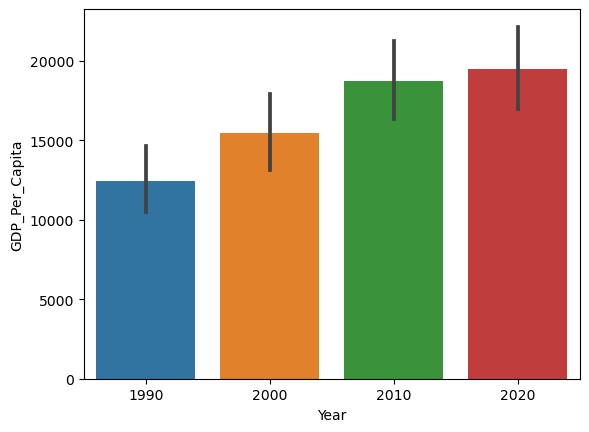

In [73]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita']) #barchart based on capita per decade in seaborn

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

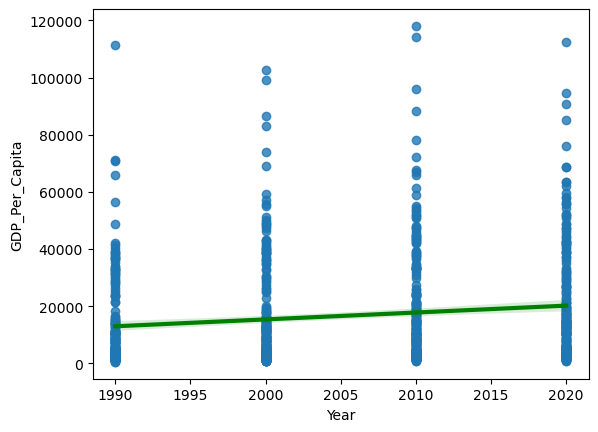

In [75]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"],
           line_kws={"color":"g","alpha":1,"lw":3}) #seaborn scatter plot showing average gdp across the 4 decades

### #11

In [29]:
gdp_10000 = gdp_df.query('GDP_Per_Capita > 99999')

In [30]:
gdp_10000.sort_values(by = 'Year', ascending = True).head(1)

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


### #12

In [31]:
data_2020.sort_values(by = 'GDP_Per_Capita', ascending = False) ##make this a list so you could add more countries to it .to_list()

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


In [32]:
Lux_gdp = gdp_df[gdp_df.Country == 'Luxembourg']

In [33]:
Lux_gdp

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

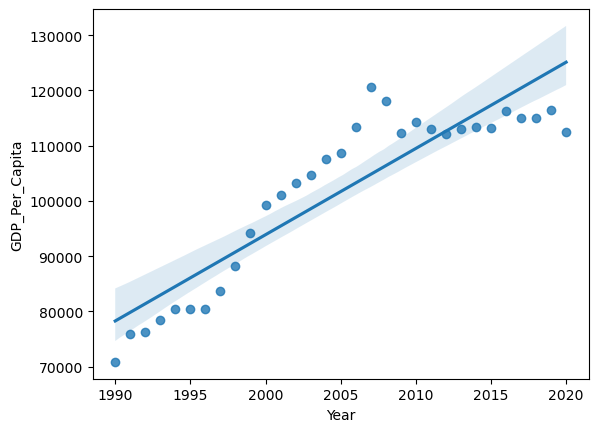

In [34]:
sns.regplot(x=Lux_gdp["Year"], y=Lux_gdp["GDP_Per_Capita"])

### #13

In [35]:
Bur_gdp = gdp_df[gdp_df.Country == 'Burundi']
Bur_gdp

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340
919,Burundi,2015,825.205574
920,Burundi,2014,886.235296
921,Burundi,2013,877.272857
922,Burundi,2012,862.715651
923,Burundi,2011,852.502576


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

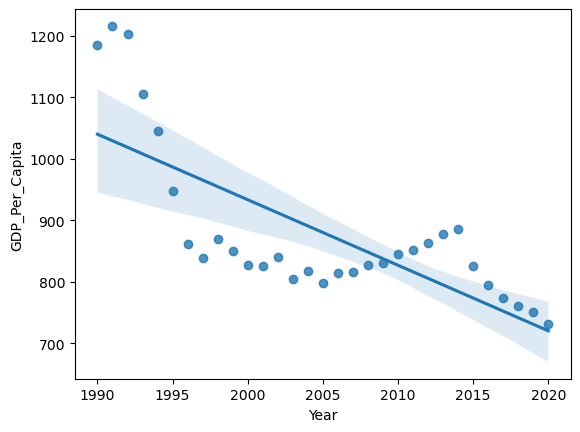

In [36]:
sns.regplot(x=Bur_gdp["Year"], y=Bur_gdp["GDP_Per_Capita"])

### Bonus 13

In [37]:
data_1990 = gdp_df[gdp_df.Year == 1990]
data_1990

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [38]:
data_bonus12 = pd.merge(data_1990, data_2020, left_on = 'Country', right_on = 'Country',
        how = 'left')
data_bonus12

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,1990,3083.976800,2020.0,3491.978104
1,Africa Western and Central,1990,2810.341129,2020.0,4021.293919
2,Albania,1990,4827.034551,2020.0,13253.733337
3,Algeria,1990,8746.340762,2020.0,10735.382539
4,Angola,1990,5758.950488,2020.0,6141.963839
...,...,...,...,...,...
201,Vanuatu,1990,2855.554643,2020.0,2878.475335
202,Vietnam,1990,2066.372215,2020.0,10338.270543
203,World,1990,9704.621768,2020.0,16269.969854
204,Zambia,1990,2190.181724,2020.0,3277.816510


In [39]:
data_bonus12.value_counts([data_bonus12.GDP_Per_Capita_x > data_bonus12.GDP_Per_Capita_y])

False    184
True      22
dtype: int64

In [40]:
data_bonus13 = data_bonus12.rename(columns = {'GDP_Per_Capita_x' : 'gdp_1990', 'GDP_Per_Capita_y' : 'gdp_2020'})


In [41]:
data_bonus13

,Country,Year_x,gdp_1990,Year_y,gdp_2020
0,Africa Eastern and Southern,1990,3083.976800,2020.0,3491.978104
1,Africa Western and Central,1990,2810.341129,2020.0,4021.293919
2,Albania,1990,4827.034551,2020.0,13253.733337
3,Algeria,1990,8746.340762,2020.0,10735.382539
4,Angola,1990,5758.950488,2020.0,6141.963839
...,...,...,...,...,...
201,Vanuatu,1990,2855.554643,2020.0,2878.475335
202,Vietnam,1990,2066.372215,2020.0,10338.270543
203,World,1990,9704.621768,2020.0,16269.969854
204,Zambia,1990,2190.181724,2020.0,3277.816510


In [42]:
data_bonus13 = data_bonus13.drop(columns = ['Year_x', 'Year_y'])

In [43]:
data_bonus13

,Country,gdp_1990,gdp_2020
0,Africa Eastern and Southern,3083.976800,3491.978104
1,Africa Western and Central,2810.341129,4021.293919
2,Albania,4827.034551,13253.733337
3,Algeria,8746.340762,10735.382539
4,Angola,5758.950488,6141.963839
...,...,...,...
201,Vanuatu,2855.554643,2878.475335
202,Vietnam,2066.372215,10338.270543
203,World,9704.621768,16269.969854
204,Zambia,2190.181724,3277.816510


In [44]:
data_bonus13[data_bonus13.gdp_1990 > data_bonus13.gdp_2020]

,Country,gdp_1990,gdp_2020
9,Aruba,32589.018572,29563.756955
15,Barbados,13985.829980,13316.487393
25,Brunei,71232.789430,62200.882043
28,Burundi,1184.842032,731.064074
33,Central African Republic,1201.674665,937.856470
39,Comoros,3061.328732,2984.413403
40,Congo,5068.286948,3497.565454
44,Dem. Rep. Congo,1819.723315,1082.445242
65,Fragile and conflict affected situations,4874.531032,4450.512739
67,Gabon,18179.170002,14320.844646


### #14

In [45]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [46]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


### #15

In [47]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [48]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


### #16

In [49]:
internet_df.Year.value_counts()[internet_df.Year.unique()]

2014    202
2013    202
2012    203
2011    207
2010    203
2009    203
2008    204
2007    206
2006    200
2005    201
2004    199
2003    196
2002    202
2001    201
1990    210
2000    199
1999    198
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1988      7
1987      7
1986      7
1985      7
1984      7
1983      7
1982      7
1981      7
1980      7
1979      7
1978      7
1977      7
1976      7
1975      7
1970      7
1965      7
1960      7
Name: Year, dtype: int64

### #17

In [50]:
internet_df.query('Internet_Users_Pct != 0').sort_values(by = 'Year', ascending = True)


,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


### #18

In [76]:
int_use_post_2000 = internet_df.loc[internet_df.Year.isin([2000, 2014])]

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

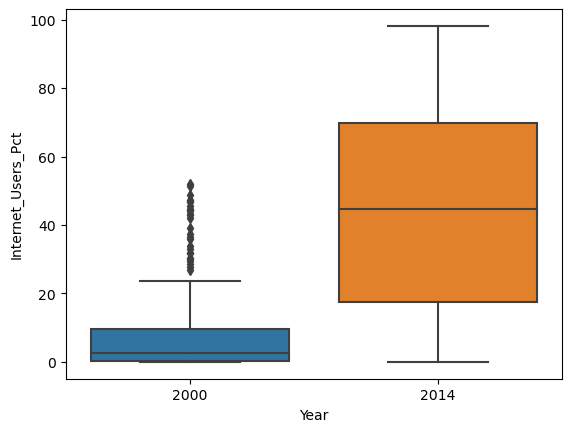

In [78]:
sns.boxplot(x=int_use_post_2000["Year"], y=int_use_post_2000["Internet_Users_Pct"])

### #19

In [53]:
internet_df.query(('Internet_Users_Pct < 5.0 and Year == 2014')).sort_values(by = 'Internet_Users_Pct')

,Country,Year,Internet_Users_Pct
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
4019,Timor-Leste,2014,1.14
623,Burundi,2014,1.38
3648,Somalia,2014,1.63
1720,Guinea,2014,1.72
2975,Niger,2014,1.95
2814,Myanmar,2014,2.10
3533,Sierra Leone,2014,2.10
782,Chad,2014,2.50


### #20

In [54]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, left_on = ['Country','Year'], right_on = ['Country', 'Year'], how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


### #21

In [55]:
gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014].sort_values(by = 'Internet_Users_Pct', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.741612,98.16
645,Bermuda,2014,77361.104881,96.80
4880,Norway,2014,62390.130313,96.30


In [56]:
fg_2014 = gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == 'Iceland') |
                         (gdp_and_internet_use['Country'] == 'Bermuda') |
                         (gdp_and_internet_use['Country'] == 'Norway')]
fg_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


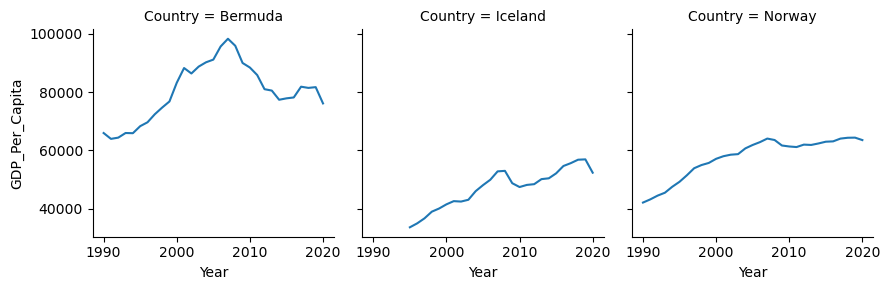

In [81]:
top_int_use = sns.FacetGrid(fg_2014, col = 'Country')
  
top_int_use.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

### #22

In [58]:
gdp_and_internet_use_2014 = gdp_and_internet_use.query('Year == 2014')
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


### #23

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

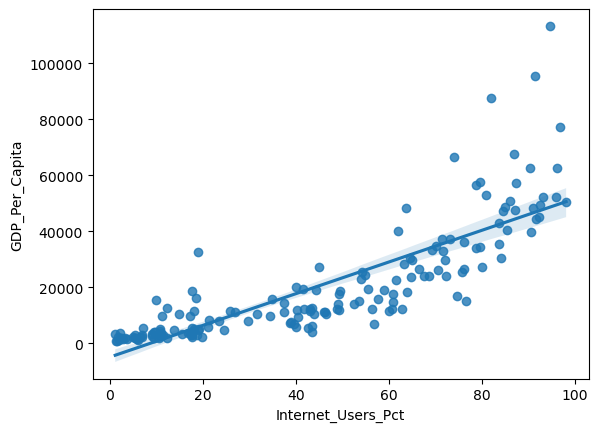

In [59]:
sns.regplot(x=gdp_and_internet_use_2014["Internet_Users_Pct"], y=gdp_and_internet_use_2014["GDP_Per_Capita"])


In [60]:
gdp_and_internet_use_2014.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3919,"Macao SAR, China",2014,155201.740571,NaN
3888,Luxembourg,2014,113313.578898,94.67
5387,Qatar,2014,95578.261511,91.49
5726,Singapore,2014,87616.637527,82.00
645,Bermuda,2014,77361.104881,96.80
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


### #24

In [61]:
gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3,
                                                 ['Low', 'Medium', 'High'])
gdp_and_internet_use_2014.sort_values(by = 'GDP_Group', ascending = True)

C:\Users\johnr\AppData\Local\Temp\ipykernel_1636\1255830075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3,


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Group
6,Afghanistan,2014,2102.384604,6.39,Low
4522,Mozambique,2014,1217.088867,5.94,Low
4491,Morocco,2014,6911.803223,56.80,Low
4255,Micronesia,2014,3339.798157,NaN,Low
4162,Mauritania,2014,4908.107752,10.70,Low
...,...,...,...,...,...
8147,Turkey,2014,NaN,51.04,NaN
8170,Venezuela,2014,NaN,57.00,NaN
8194,Viet Nam,2014,NaN,48.31,NaN
8214,Virgin Islands (U.S.),2014,NaN,50.07,NaN


### #25

In [62]:
gdp_and_internet_use_2014.groupby('GDP_Group')['Internet_Users_Pct'].median()

GDP_Group
Low       10.60
Medium    43.00
High      78.74
Name: Internet_Users_Pct, dtype: float64